## Importing Data

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
diabetes = pd.read_csv("C:\\Users\\User\\Desktop\\Dataset\\diabetes.csv")
profile = ProfileReport(diabetes,title="Pandas Profiling Report")

In [ ]:
profile.to_file("your_report.html")

## Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

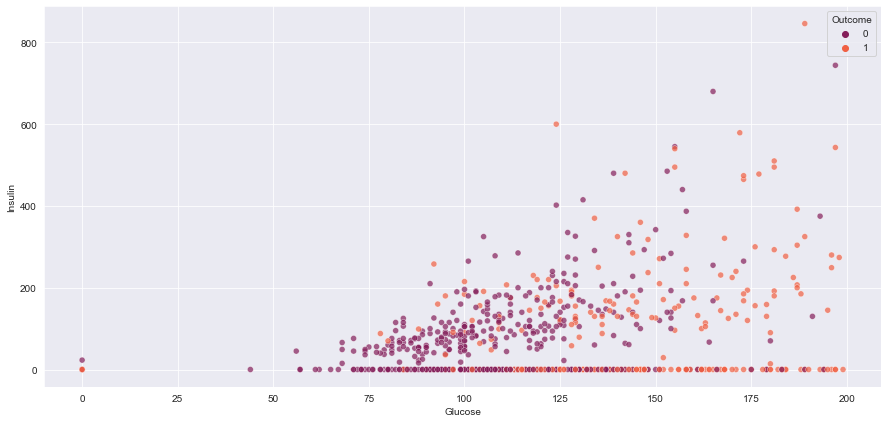

In [4]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.scatterplot(data=diabetes, x='Glucose', y='Insulin', hue='Outcome', palette='rocket',alpha=.7)

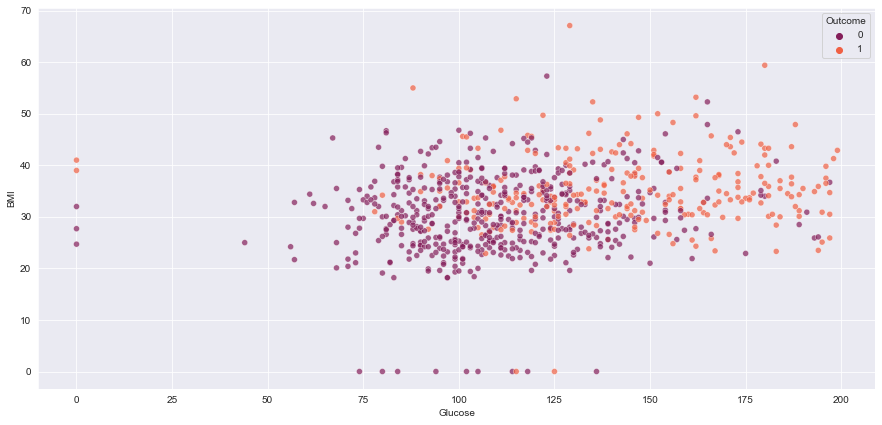

In [5]:
plt.figure(figsize=(15,7))
sns.set_style("darkgrid")
sns.scatterplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome', palette='rocket',alpha=.7)

(array([ 11.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,  25.,  57.,
         74.,  83.,  94.,  91., 100.,  70.,  54.,  29.,  29.,  20.,   4.,
          4.,   4.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([ 0.        ,  2.23666667,  4.47333333,  6.71      ,  8.94666667,
        11.18333333, 13.42      , 15.65666667, 17.89333333, 20.13      ,
        22.36666667, 24.60333333, 26.84      , 29.07666667, 31.31333333,
        33.55      , 35.78666667, 38.02333333, 40.26      , 42.49666667,
        44.73333333, 46.97      , 49.20666667, 51.44333333, 53.68      ,
        55.91666667, 58.15333333, 60.39      , 62.62666667, 64.86333333,
        67.1       ]),
 <a list of 30 Patch objects>)

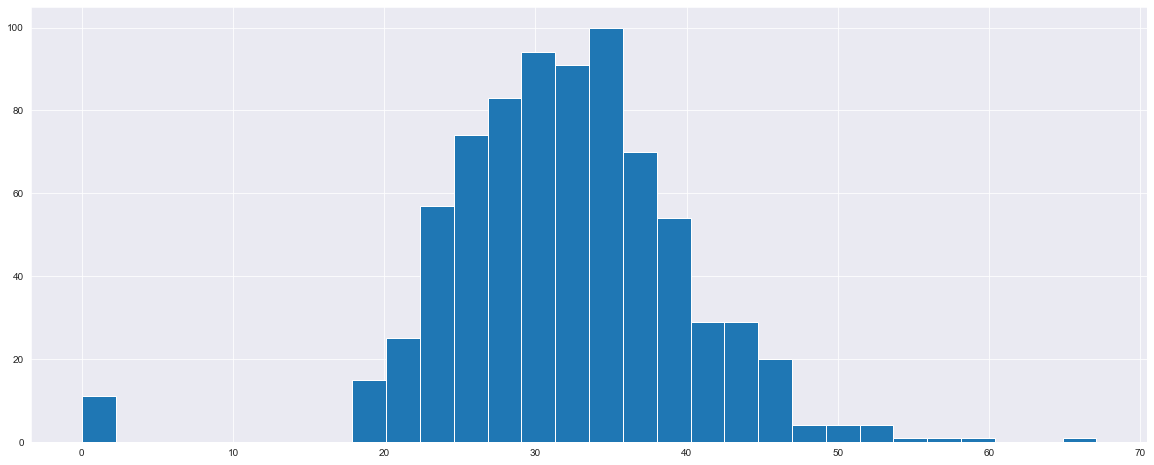

In [6]:
plt.figure(figsize=(20,8))
plt.hist(data=diabetes, x='BMI', bins=30)

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  3.,  9., 20., 41.,
        51., 64., 81., 69., 61., 72., 47., 44., 33., 34., 28., 20., 17.,
        19., 17., 13., 16.]),
 array([  0.        ,   6.63333333,  13.26666667,  19.9       ,
         26.53333333,  33.16666667,  39.8       ,  46.43333333,
         53.06666667,  59.7       ,  66.33333333,  72.96666667,
         79.6       ,  86.23333333,  92.86666667,  99.5       ,
        106.13333333, 112.76666667, 119.4       , 126.03333333,
        132.66666667, 139.3       , 145.93333333, 152.56666667,
        159.2       , 165.83333333, 172.46666667, 179.1       ,
        185.73333333, 192.36666667, 199.        ]),
 <a list of 30 Patch objects>)

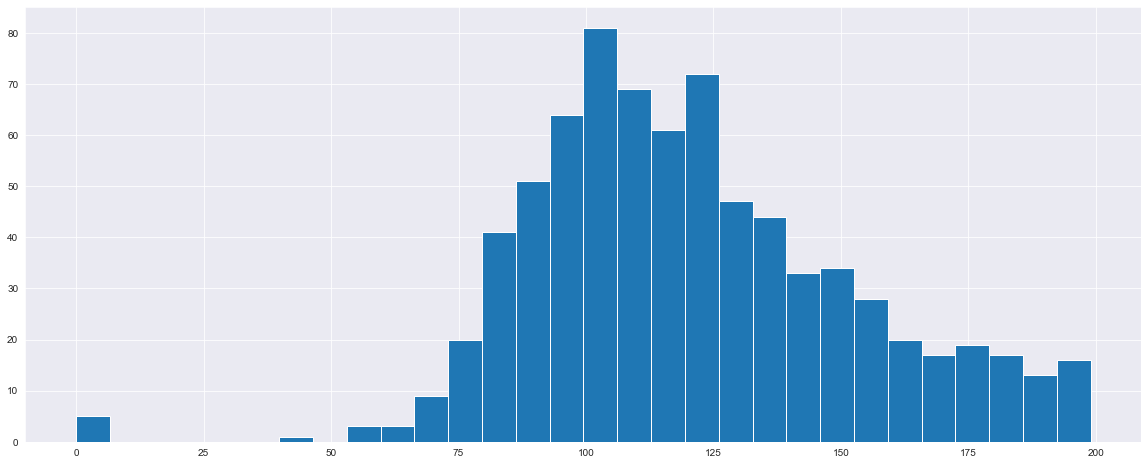

In [7]:
plt.figure(figsize=(20,8))
plt.hist(data=diabetes, x='Glucose', bins=30)

### Outliers

In [4]:
q1_b = diabetes["BMI"].quantile(0.25)
q3_b = diabetes["BMI"].quantile(0.75)

iqr_b = q3_b - q1_b

min = q1_b - (1.5*iqr_b)
max = q3_b + (1.5*iqr_b)

In [5]:
min_index = diabetes[diabetes["BMI"] < min].index
max_index = diabetes[diabetes["BMI"] > max].index

print(min_index)
print(max_index)

Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')
Int64Index([120, 125, 177, 193, 247, 303, 445, 673], dtype='int64')


In [6]:
diabetes.drop(min_index, inplace=True)
diabetes.drop(max_index, inplace=True)

(array([ 5., 10., 11., 16., 20., 31., 42., 31., 38., 37., 39., 52., 30.,
        56., 47., 51., 39., 31., 31., 32., 14., 18., 11., 21.,  8., 10.,
        10.,  0.,  4.,  4.]),
 array([18.2 , 19.26, 20.32, 21.38, 22.44, 23.5 , 24.56, 25.62, 26.68,
        27.74, 28.8 , 29.86, 30.92, 31.98, 33.04, 34.1 , 35.16, 36.22,
        37.28, 38.34, 39.4 , 40.46, 41.52, 42.58, 43.64, 44.7 , 45.76,
        46.82, 47.88, 48.94, 50.  ]),
 <a list of 30 Patch objects>)

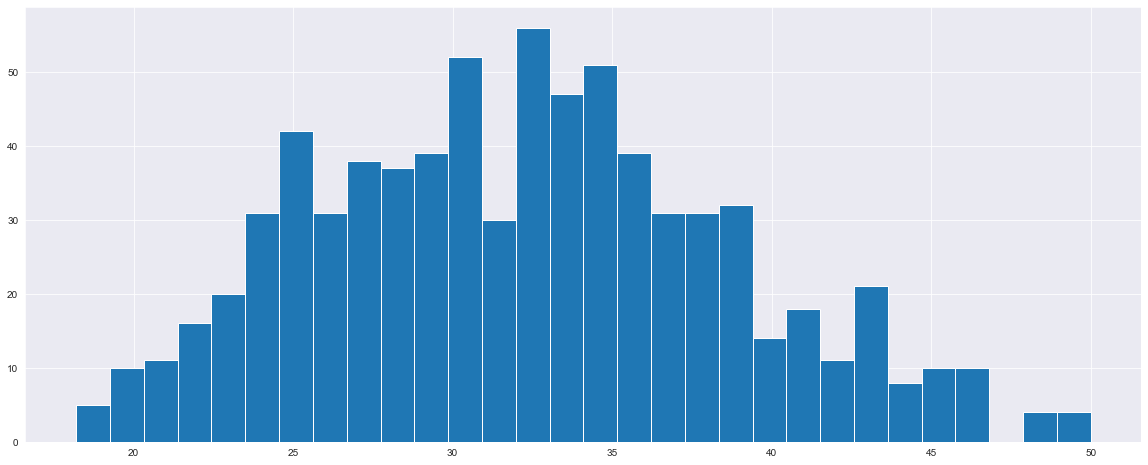

In [11]:
plt.figure(figsize=(20,8))
plt.hist(data=diabetes, x='BMI', bins=30)

In [7]:
q1_gl = diabetes["Glucose"].quantile(0.25)
q3_gl = diabetes["Glucose"].quantile(0.75)

iqr_gl = q3_gl - q1_gl

min = q1_gl - (1.5*iqr_gl)
max = q3_gl + (1.5*iqr_gl)

min_index = diabetes[diabetes["Glucose"] < min].index
max_index = diabetes[diabetes["Glucose"] > max].index

print(min_index)
print(max_index)

diabetes.drop(min_index, inplace=True)
diabetes.drop(max_index, inplace=True)

Int64Index([75, 182, 342, 349, 502], dtype='int64')
Int64Index([], dtype='int64')


(array([ 1.,  0.,  3.,  2.,  5., 11., 18., 31., 35., 44., 54., 48., 70.,
        43., 44., 53., 41., 26., 36., 34., 18., 18., 19., 15., 17.,  8.,
        18., 10.,  8., 14.]),
 array([ 44.        ,  49.16666667,  54.33333333,  59.5       ,
         64.66666667,  69.83333333,  75.        ,  80.16666667,
         85.33333333,  90.5       ,  95.66666667, 100.83333333,
        106.        , 111.16666667, 116.33333333, 121.5       ,
        126.66666667, 131.83333333, 137.        , 142.16666667,
        147.33333333, 152.5       , 157.66666667, 162.83333333,
        168.        , 173.16666667, 178.33333333, 183.5       ,
        188.66666667, 193.83333333, 199.        ]),
 <a list of 30 Patch objects>)

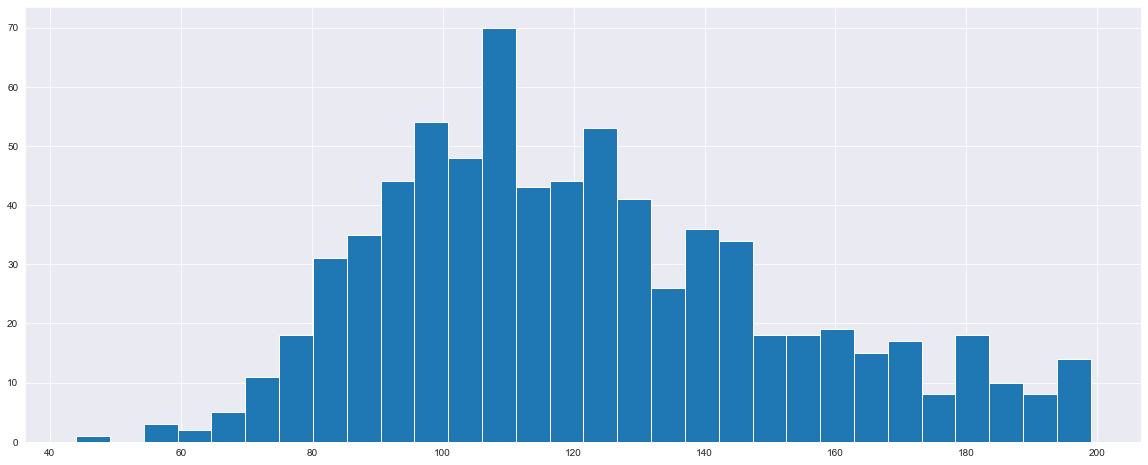

In [13]:
plt.figure(figsize=(20,8))
plt.hist(data=diabetes, x='Glucose', bins=30)

In [22]:
diabetes.isna().sum().sum()

0

In [8]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [15]:
print(X.shape)
print(y.shape)

(744, 8)
(744,)


# Model

## Support Vector Classifier

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [17]:
clf = SVC()
scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, shuffle=True)

cv = cross_val_score(clf, x_train, y_train, cv=10)

clf.fit(x_train, y_train)

SVC()

In [18]:
preds = clf.predict(x_test)
acc = clf.score(x_test, y_test)
print("Modelin test verisinde doğru tahmin yüzdesi: {}".format(acc*100))

Modelin test verisinde doğru tahmin yüzdesi: 75.89285714285714


In [19]:
for i,j in enumerate(cv):
    print("Split " + str(i+1) + " için Accuracy: " + str(cv[i]*100))

Split 1 için Accuracy: 73.07692307692307
Split 2 için Accuracy: 75.0
Split 3 için Accuracy: 75.0
Split 4 için Accuracy: 75.0
Split 5 için Accuracy: 71.15384615384616
Split 6 için Accuracy: 75.0
Split 7 için Accuracy: 86.53846153846155
Split 8 için Accuracy: 80.76923076923077
Split 9 için Accuracy: 76.92307692307693
Split 10 için Accuracy: 75.0


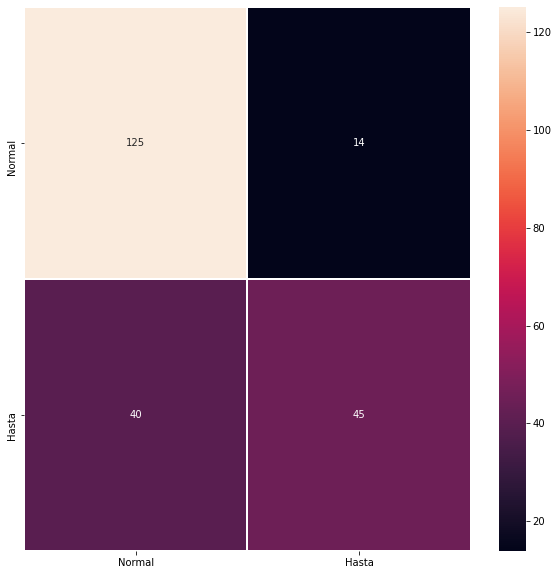

In [30]:
con_mat = confusion_matrix(y_test, preds)
con_mat = pd.DataFrame(con_mat, index = ['0','1'], columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(con_mat,linewidth = 1, annot = True, fmt='',xticklabels = ['Normal', 'Hasta'],yticklabels = ['Normal', 'Hasta'])

In [32]:
print(classification_report(y_test, preds, target_names = ['Normal (Class 0)','Pneumonia (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       0.76      0.90      0.82       139
Pneumonia (Class 1)       0.76      0.53      0.62        85

           accuracy                           0.76       224
          macro avg       0.76      0.71      0.72       224
       weighted avg       0.76      0.76      0.75       224

